## Preparing our dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df1 = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')

In [61]:
df1.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [62]:
df2 = pd.read_json('datasets/echonest-metrics.json')
df2.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [63]:
dset = pd.merge(df1,df2)

In [14]:
dset.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,tags,title,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,[],Hundred-Year Flood,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],...,[],Squares And Circles,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],...,[],Maps of the Stars Homes,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,192000,0,James Squeaky,2008-11-26 01:46:02,2006-01-01 00:00:00,144,1,Rock,[25],...,[],Boss of Goth,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,192000,0,NaN,2008-11-26 01:46:05,2006-10-07 00:00:00,181,0,Rock,[25],...,[],Industry Standard Massacre,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [64]:
dset.isnull().sum()

track_id               0
bit_rate               0
comments               0
composer            4696
date_created           0
date_recorded       3568
duration               0
favorites              0
genre_top              0
genres                 0
genres_all             0
information         4468
interest               0
language_code       2203
license               13
listens                0
lyricist            4789
number                 0
publisher           4775
tags                   0
title                  0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
dtype: int64

In [65]:
len(dset)

4802

In [66]:
dset.columns

Index(['track_id', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [67]:
dset.drop(['composer','date_recorded','information','language_code','lyricist','publisher'], axis =1, inplace = True)

In [68]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 23 columns):
track_id            4802 non-null int64
bit_rate            4802 non-null int64
comments            4802 non-null int64
date_created        4802 non-null object
duration            4802 non-null int64
favorites           4802 non-null int64
genre_top           4802 non-null object
genres              4802 non-null object
genres_all          4802 non-null object
interest            4802 non-null int64
license             4789 non-null object
listens             4802 non-null int64
number              4802 non-null int64
tags                4802 non-null object
title               4802 non-null object
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null 

In [69]:
dset.drop(['track_id', 'bit_rate', 'comments', 'date_created',
        'duration', 'favorites', 'genres',
       'genres_all', 'interest',  'license',
       'listens', 'number', 'tags', 'title'], axis =1, inplace = True)

In [70]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 9 columns):
genre_top           4802 non-null object
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
dtypes: float64(8), object(1)
memory usage: 375.2+ KB


In [71]:
dset['track_id'] = df1['track_id']

In [72]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
genre_top           4802 non-null object
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
track_id            4802 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [73]:
dset.count()

genre_top           4802
acousticness        4802
danceability        4802
energy              4802
instrumentalness    4802
liveness            4802
speechiness         4802
tempo               4802
valence             4802
track_id            4802
dtype: int64

In [79]:
dset['genre_top'].value_counts()

0    3892
1     910
Name: genre_top, dtype: int64

In [78]:
def g_convertor(gtop):
    if gtop == 'Rock':
        return 0
    else:
        return 1

dset['genre_top'] = dset['genre_top'].apply(g_convertor)

In [80]:
dset.head()

,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,track_id
0,0,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,135
1,0,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632,136
2,0,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325,151
3,0,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347,152
4,0,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548,153


In [43]:
dset['genre_top'].value_counts()

1    4802
Name: genre_top, dtype: int64

## Pairwise relationships between continuous variables

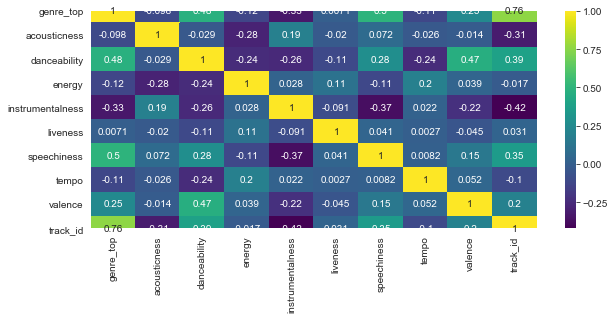

In [159]:
plt.figure(figsize = (10,4))
sns.heatmap(dset.corr(), cmap = 'viridis', annot = True)

In [160]:
dset.corr()

,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,track_id
genre_top,1.000000,-0.097748,0.484457,-0.124860,-0.326037,0.007070,0.496495,-0.114571,0.246701,0.758661
acousticness,-0.097748,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841,-0.310883
danceability,0.484457,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165,0.392682
energy,-0.124860,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603,-0.016814
instrumentalness,-0.326037,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967,-0.418748
liveness,0.007070,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093,0.030647
speechiness,0.496495,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894,0.354188
tempo,-0.114571,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221,-0.102769
valence,0.246701,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000,0.201585
track_id,0.758661,-0.310883,0.392682,-0.016814,-0.418748,0.030647,0.354188,-0.102769,0.201585,1.000000


## Exploratory Data Analysis

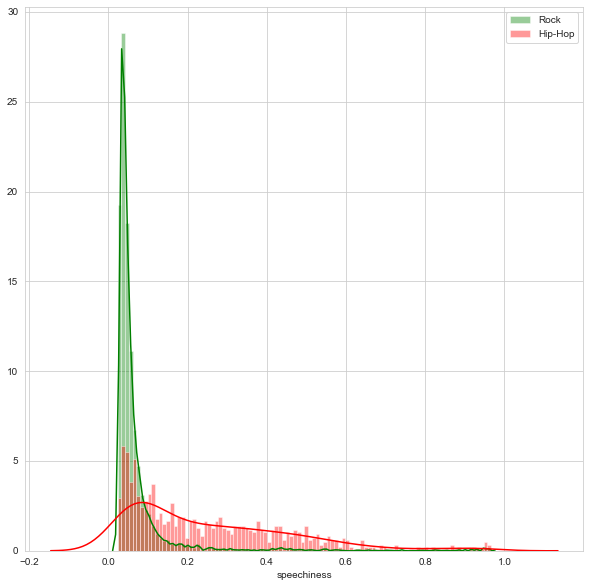

In [99]:
plt.figure(figsize = (10,10))
sns.set_style('whitegrid')
sns.distplot(dset['speechiness'][dset['genre_top'] == 0] , bins = 100,color = 'g', label = 'Rock' )
sns.distplot(dset['speechiness'][dset['genre_top'] == 1] , bins = 100, color = 'r' , label = 'Hip-Hop')
plt.legend()

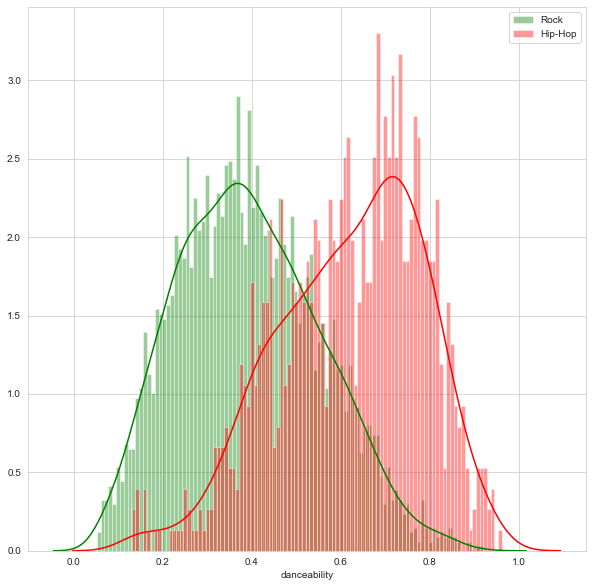

In [100]:
plt.figure(figsize = (10,10))
sns.set_style('whitegrid')
sns.distplot(dset['danceability'][dset['genre_top'] == 0] , bins = 100,color = 'g', label = 'Rock' )
sns.distplot(dset['danceability'][dset['genre_top'] == 1] , bins = 100, color = 'r' , label = 'Hip-Hop')
plt.legend()

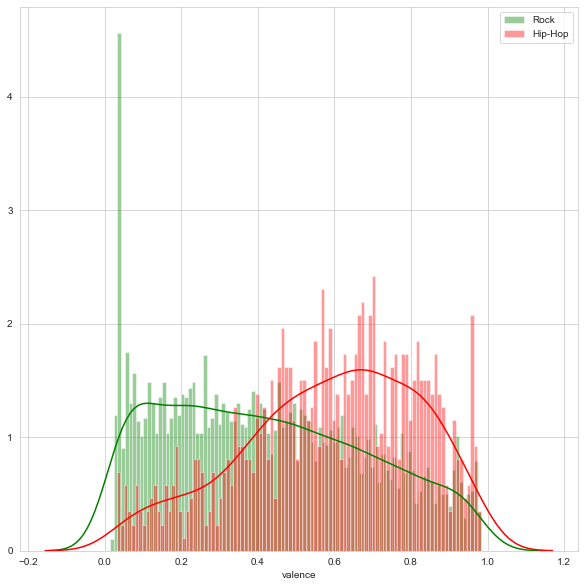

In [101]:
plt.figure(figsize = (10,10))
sns.set_style('whitegrid')
sns.distplot(dset['valence'][dset['genre_top'] == 0] , bins = 100,color = 'g', label = 'Rock' )
sns.distplot(dset['valence'][dset['genre_top'] == 1] , bins = 100, color = 'r' , label = 'Hip-Hop')
plt.legend()

<Figure size 1440x288 with 0 Axes>

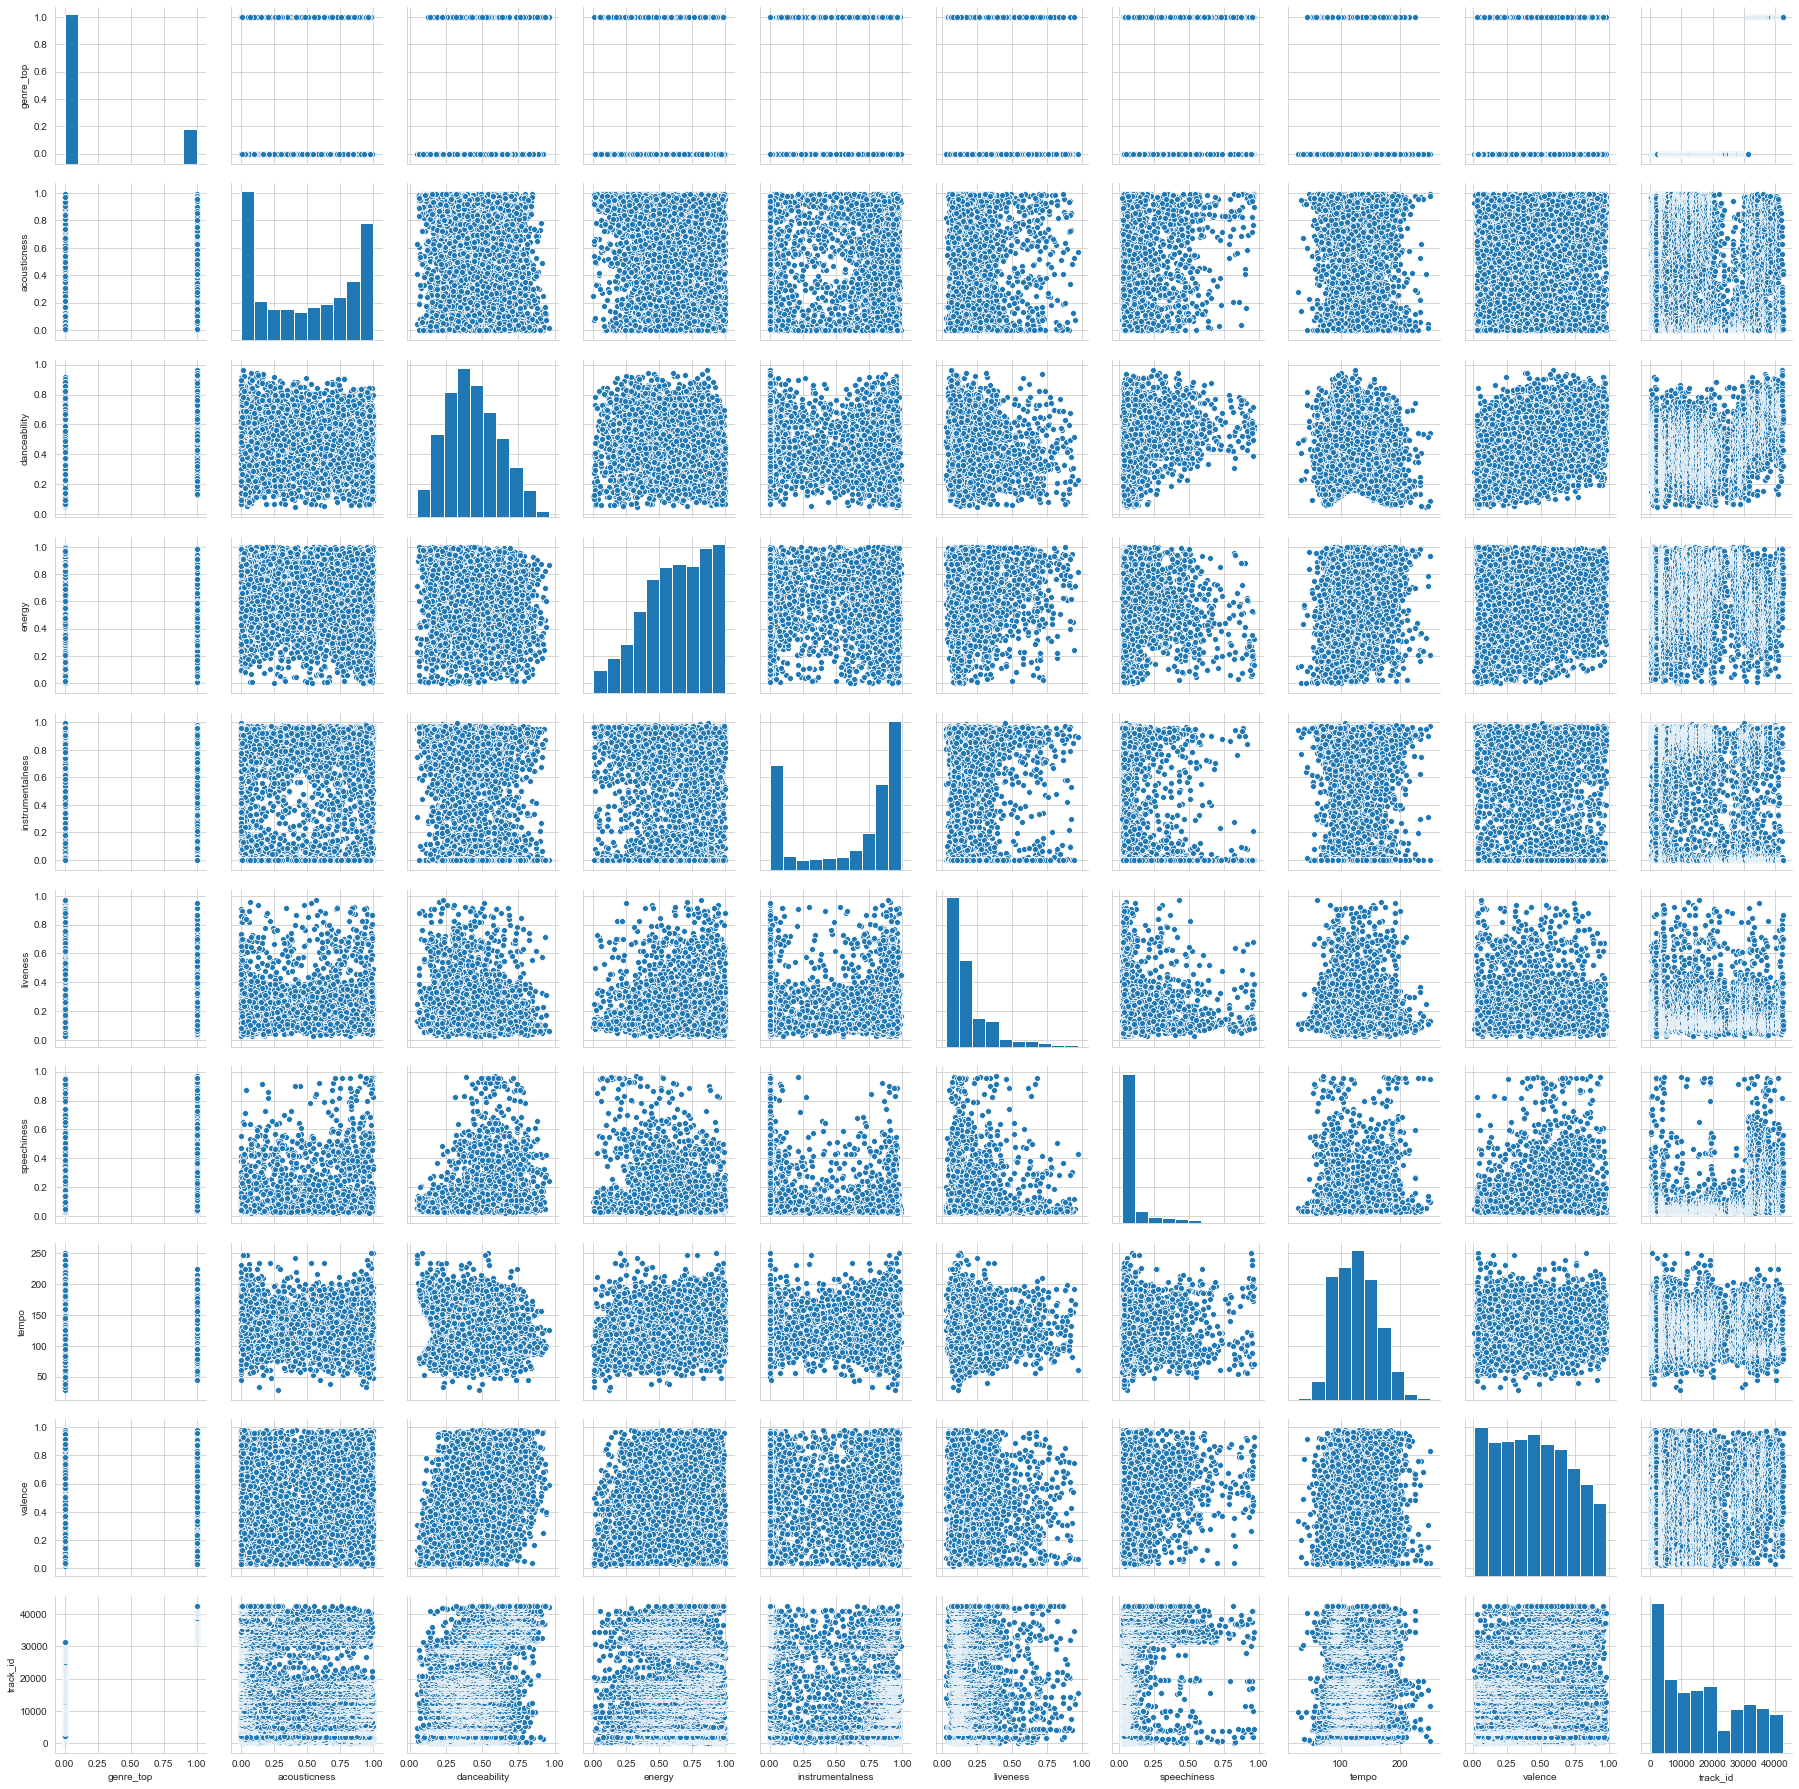

In [162]:
plt.figure(figsize = (20,4))
sns.pairplot(dset)

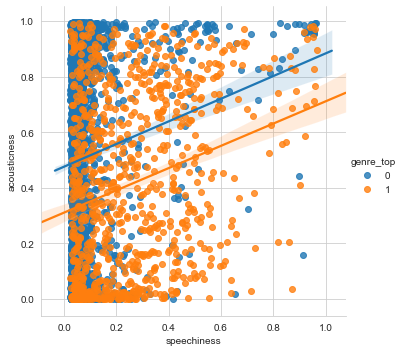

In [163]:
sns.lmplot(x = 'speechiness', y = 'acousticness', data = dset, hue = 'genre_top')

## Normalizing the data

In [161]:
X = dset.drop(['genre_top', 'track_id'],axis = 1)
y = dset['genre_top']

In [113]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [115]:
X_scaled= scaler.transform(X)

## Principal Component Analysis

In [120]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [121]:
X_pca = pca.transform(X_scaled)

In [122]:
X_scaled.shape

(4802, 8)

In [123]:
X_pca.shape

(4802, 8)

Text(0.5, 0, 'Principal Component #')

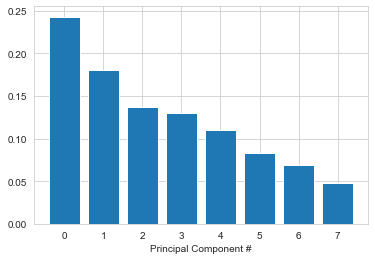

In [125]:
exp_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.bar(range(8), exp_variance)
ax.set_xlabel('Principal Component #')

## Splitting the data

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 101)

## Training a decison tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
predictions = dtree.predict(X_test)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix
print('Decision Tree')
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

Decision Tree


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1171
           1       0.64      0.67      0.65       270

    accuracy                           0.87      1441
   macro avg       0.78      0.79      0.78      1441
weighted avg       0.87      0.87      0.87      1441



[[1069  102]
 [  90  180]]


In [131]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

## Logistic Regression

In [133]:
logmodel.fit(X_train, y_train)
pred_log = logmodel.predict(X_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
print('Decision Tree')
print('\n')
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('Logistic Regression')
print('\n')
print(classification_report(y_test, pred_log))
print('\n')
print(confusion_matrix(y_test, pred_log))

Decision Tree


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1171
           1       0.64      0.67      0.65       270

    accuracy                           0.87      1441
   macro avg       0.78      0.79      0.78      1441
weighted avg       0.87      0.87      0.87      1441



[[1069  102]
 [  90  180]]


Logistic Regression


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1171
           1       0.80      0.57      0.66       270

    accuracy                           0.89      1441
   macro avg       0.85      0.77      0.80      1441
weighted avg       0.89      0.89      0.88      1441



[[1133   38]
 [ 117  153]]


In [140]:
dset['genre_top'].value_counts()

0    3892
1     910
Name: genre_top, dtype: int64

## Balancing the data and performing classification on balanced data

In [148]:
hop = dset[dset['genre_top'] == 1]

In [149]:
rock = dset[dset['genre_top'] == 0].sample(len(hop), random_state=10)

In [150]:
dset_bal = pd.concat([hop,rock])

In [151]:
dset_bal['genre_top'].value_counts()

1    910
0    910
Name: genre_top, dtype: int64

In [152]:
X_bal = dset_bal.drop(['genre_top', 'track_id'], axis = 1)
y_bal = dset_bal['genre_top']

In [153]:
X_pca_bal = pca.fit_transform(scaler.fit_transform(X_bal))

In [154]:
X_train,X_test, y_train,y_test = train_test_split(X_pca_bal, y_bal, test_size = 0.3, random_state = 101)

In [155]:
dtree.fit(X_train, y_train)
predictions_bal = dtree.predict(X_test)
logmodel.fit(X_train, y_train)
pred_log_bal = logmodel.predict(X_test)
print('Decision Tree')
print('\n')
print(classification_report(y_test, predictions_bal))
print('\n')
print(confusion_matrix(y_test, predictions_bal))
print('\n')
print('Logistic Regression')
print('\n')
print(classification_report(y_test, pred_log_bal))
print('\n')
print(confusion_matrix(y_test, pred_log_bal))

Decision Tree


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       267
           1       0.85      0.84      0.84       279

    accuracy                           0.84       546
   macro avg       0.84      0.84      0.84       546
weighted avg       0.84      0.84      0.84       546



[[225  42]
 [ 46 233]]


Logistic Regression


              precision    recall  f1-score   support

           0       0.86      0.91      0.89       267
           1       0.91      0.86      0.88       279

    accuracy                           0.88       546
   macro avg       0.89      0.89      0.88       546
weighted avg       0.89      0.88      0.88       546



[[243  24]
 [ 39 240]]


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Balancing improves the models upto a large extent

## Evaluation of models through Cross Validation

In [157]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(n_splits=10, random_state=10)

cv_tree = DecisionTreeClassifier(random_state=10)
cv_logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(cv_tree,X_pca_bal, y_bal, cv=kf)
logit_score = cross_val_score(cv_logreg, X_pca_bal, y_bal, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7703296703296703 Logistic Regression: 0.8318681318681319


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

## The End!